In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2.Load Dataset
data = pd.read_csv("halong_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2024,5,28,141,10,500,NaN
1,2/29/2024,64,37,149,10,500,NaN
2,2/28/2024,39,25,146,14,500,NaN
3,2/27/2024,24,10,141,21,500,NaN
4,2/26/2024,43,37,145,11,500,NaN
...,...,...,...,...,...,...,...
1823,3/5/2019,48,17,16,1,500,NaN
1824,3/4/2019,27,3,4,16,500,NaN
1825,3/3/2019,43,28,5,9,500,NaN
1826,3/2/2019,59,55,1,6,500,NaN


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1828 non-null   object 
 1   pm25    1828 non-null   int64  
 2   pm10    1828 non-null   int64  
 3   o3      1828 non-null   int64  
 4   no2     1828 non-null   int64  
 5   so2     1828 non-null   int64  
 6   co      0 non-null      float64
dtypes: float64(1), int64(5), object(1)
memory usage: 100.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.0,0.0
mean,39.897155,23.573851,17.550875,9.650985,500.0,NaN
std,23.213375,13.615468,18.279145,7.957032,0.0,NaN
min,5.000000,3.000000,1.000000,1.000000,500.0,NaN
25%,22.000000,13.000000,8.000000,1.000000,500.0,NaN
50%,37.000000,22.000000,13.000000,9.000000,500.0,NaN
75%,54.000000,32.000000,21.000000,15.000000,500.0,NaN
max,163.000000,86.000000,268.000000,36.000000,500.0,NaN


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,5
1,64
2,39
3,24
4,43
...,...
1823,48
1824,27
1825,43
1826,59


<Axes: >

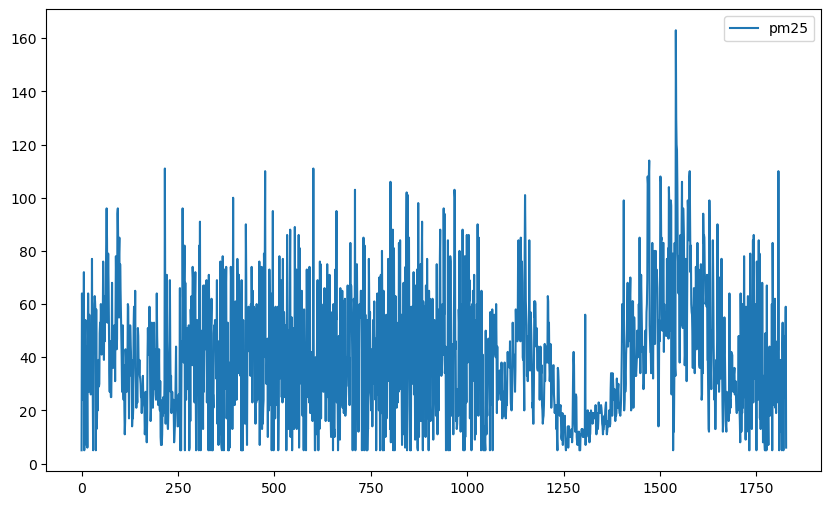

In [5]:
data.plot(figsize=(10,6))

In [6]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1462
Test data size: 366


In [7]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [8]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['pm25'])
y_pred = model.predict(x_test)


In [9]:
#5 Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo mảng 30 ngày tiếp theo
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán
y_next_30_days = model.predict(x_next_30_days)

# In ra dự đoán giá trong 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[29.43912583 29.43165643 29.42418702 29.41671761 29.40924821 29.4017788
 29.3943094  29.38683999 29.37937058 29.37190118 29.36443177 29.35696237
 29.34949296 29.34202355 29.33455415 29.32708474 29.31961534 29.31214593
 29.30467652 29.29720712 29.28973771 29.28226831 29.2747989  29.26732949
 29.25986009 29.25239068 29.24492128 29.23745187 29.22998246 29.22251306]


In [10]:
# 6. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 7. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 8. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)



Testing RMSE: 32.33872083415623

Testing MAPE: 63.41385301162219

MAE: 24.688840621726207


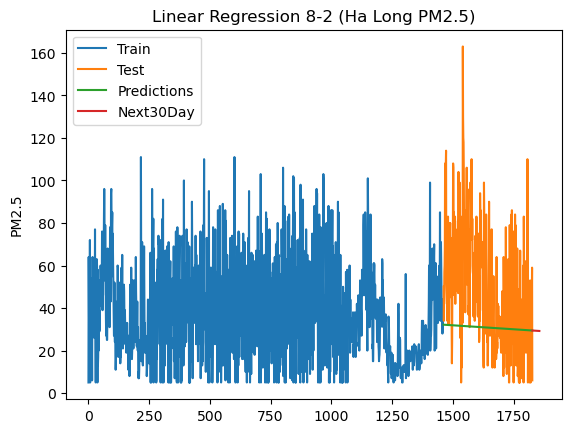

In [11]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('Linear Regression 8-2 (Ha Long PM2.5)')
plt.ylabel('PM2.5')
plt.show()

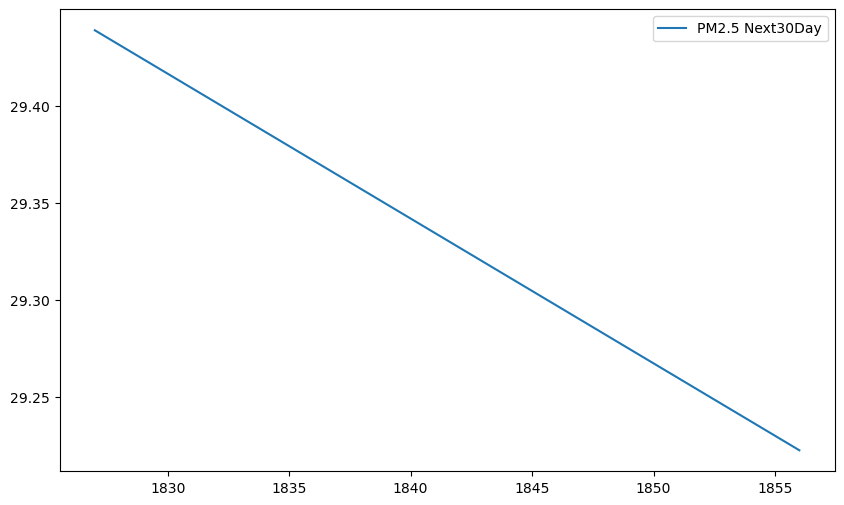

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(last_data,y_next_30_days)
plt.legend(['PM2.5 Next30Day'])
plt.show()

In [13]:
test_data.index

RangeIndex(start=1462, stop=1828, step=1)